#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
import urllib.request, shutil
with urllib.request.urlopen("https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py") as response, open("module_update.py", 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

#### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css

Updated file nbtext.py


In [3]:
css()

# Dewey og Bayes

Her har du selve notebooken som henter ut navn og lager graf.

### Start med å importere modulene

In [4]:
update('graph_networkx_louvain')
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph

Updated file graph_networkx_louvain.py


## Bygg korpus og analysér

Hent URN-er fra tekst eller metadata

In [5]:
nb.get_urn({'ddk':"641%", 'limit':100})

[[2010043003025, 'Dimbleby, Josceline', 'Så godt som grønt', 1995],
 [2014120108134, 'Sefland, Aslaug', 'Matglede for diabetikere', 1987],
 [2007112604056, 'Notaker, Henry', 'Ganens makt', 1993],
 [2010042903011, 'Jansz, Meg', 'Hjemmets beste burgere', 1997],
 [2008070304030, '', 'Birasoahppu vuođđoskuvllas', 1992],
 [2014090306078, '', 'Vi vil vite hva vi kjøper', 1986],
 [2014020548024, 'Sjøen, Nina', 'Søtt', 2000],
 [2012022208116, 'Engh, André', 'Kjøkken-ordbok', 1972],
 [2007032701042, 'Pharo, Aase Kilander', 'Hva skal vi ha til middag?', 1964],
 [2010081003026, 'Bogø, Jette', 'Jordbær', 1998],
 [2011062405035, '', 'Mat fra alle land', 1978],
 [2010033020007, '', 'Fisk', 1998],
 [2007083001065, 'Hovig, Ingrid Espelid', 'Festkaker', 1991],
 [2010071903019, 'Maurer, Anita', 'Lett og godt fra Indonesia', 1998],
 [2010081803036, 'Thommessen, Maria', 'Mat hver dag', 1995],
 [2007121104005, '', 'Norwegian kitchen', 1993],
 [2007111401021, 'Craig, Diana', 'Mormors kjøkkenråd', 1992],
 [2

In [6]:
korpus = nb.Corpus(ddk='641%', period = (1960, 2010))

In [7]:
korpus.difference(doc_exp=1.1, freq_exp=1.1)

In [8]:
korpus.target_urn

[2011032108076,
 2013062438223,
 2016011448168,
 2014070748005,
 2014052308060,
 2009062903001,
 2014112707555,
 2010033020009,
 2011022403015,
 2008100804066,
 2015081948206,
 2012072638011,
 2016011248112,
 2011071306043,
 2012121106068,
 2008102900013,
 2014112707521,
 2008080400066,
 2010071203015,
 2011060308025,
 2008121100021,
 2012070505095,
 2011050308023,
 2013102108154,
 2008091004001,
 2013091638012,
 2011021603057,
 2008012801010,
 2014062607104,
 2012070238004,
 2012082208093,
 2014071007077,
 2014110448080,
 2010120808024,
 2010042803033,
 2015082448234,
 2008120300023,
 2014110448161,
 2016070448079,
 2010022503036,
 2010070508001,
 2014110607589,
 2016060848002,
 2011071205589,
 2010022503011,
 2009012904039,
 2015090948061,
 2013121908091,
 2012102907021,
 2011070608027,
 2015042348043,
 2014022148007,
 2013062438134,
 2010060903010,
 2009081903032,
 2010050603039,
 2011021403038,
 2010071303015,
 2011021403006,
 2015052748008,
 2012071638016,
 2008102100028,
 2014030

In [27]:
grafer = dict()
missed = []
for u in korpus.target_urn:
    try:
        grafer[u] = nb.make_network_graph(u,list(korpus.difference(doc_exp=1.01, freq_exp=1.01, aslist = False).index)[:300]) 
    except:
        missed.append(nb.metadata(u))

## Analyse

Hent ut mulige navn fra boken

In [28]:
graf = nx.compose_all([grafer[u] for u in grafer])

Clustring slik fargene viser

In [29]:
len(grafer)

96

In [30]:
gnl.show_community(graf)

1 røren, gjær, melken, oljen, kakene, Bland, sjokolade, deig, melet, Visp, Avkjøl, bland, vaniljesukker, kanel, smøret, Smelt, krem, tilsatt, deigen, mel, smurt, Rør, bakepapir, rist, skjær, bakepulver, Fordel, Stek, fløten, kaken

2 Tilsett, suppen, Rens, stekeovnen, kok, Ha, ildfast, fisken, Skjær, tomatene, blandingen, grønnsakene, krydder, Server, Legg, tomatpuré, Sil, Smak, møre, ost, løken, Dryss, Vend, panne, smak, sausen, kjele, tilsett, rødvin, smør, kokte, saus, Pensle, minutten, stek, kjøttet, Kok, koke, Hell, dryss

3 bollen, créme, soyasaus, terninger, Pynt, salaten, eggene, renne, hvitløkfedd, boks, eddik, kremfløte, laurbærblad, hakkede, brun, rømme, honning, salat, kyllingen, gryte, stekepanne, osten, kapers, server, Pisk, squash, Serveres, rosiner, oppskrift, serveres, fyllet, Strø, timian, Dekk, porsjon, Skrell, dill, småkoke, fett, avkjøles, Fjern, sjalottløk, Fres, tørkede, hvitløken, saltet, gressløk, appelsin, bunt, koker, surre, omrøring, sennep, Skyll, pasta, bu

Se litt på hva statistikken viser

In [16]:
dict(nb.central_betweenness_characters(graf, n=10))

{'200': 9.742833974632217e-05,
 'g': 9.742833974632217e-05,
 'resten': 9.742833974632217e-05,
 'Bland': 9.742833974632217e-05,
 'Dryss': 9.742833974632217e-05,
 'La': 9.742833974632217e-05,
 'Tilsett': 9.742833974632217e-05,
 'bland': 9.742833974632217e-05,
 'bolle': 9.742833974632217e-05,
 'egg': 9.742833974632217e-05}

In [14]:
dict(nb.central_characters(graf, n=10))

{'200': 1.0,
 'g': 1.0,
 'resten': 1.0,
 'Bland': 1.0,
 'Dryss': 1.0,
 'La': 1.0,
 'Tilsett': 1.0,
 'bland': 1.0,
 'bolle': 1.0,
 'egg': 1.0}

Lager en subgraf basert på vekting av buene i grafen

In [23]:
subedge = [(edge[0], edge[1]) for edge in graf.edges(data=True) if edge[2]['weight'] > 30]

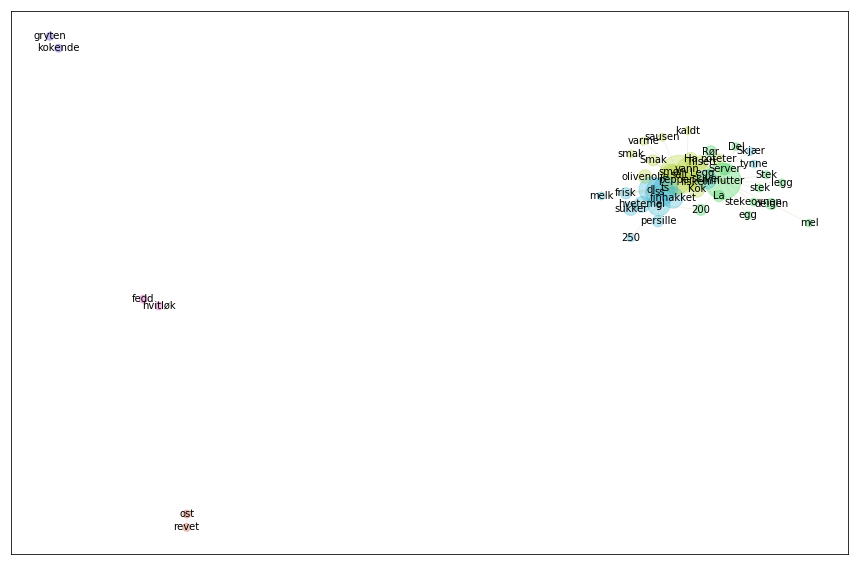

In [24]:
gnl.show_graph(graf.edge_subgraph(subedge))

In [25]:
nb.central_betweenness_characters(graf.edge_subgraph(subedge))

[('salt', 0.34199700270178995),
 ('minutter', 0.3059249408983451),
 ('ss', 0.07677199425869638),
 ('skiver', 0.07180851063829786),
 ('pepper', 0.06915843465045593),
 ('dl', 0.0631712259371834),
 ('g', 0.058543355285376554),
 ('vann', 0.046453900709219856),
 ('deigen', 0.03634751773049645),
 ('ts', 0.02734084768659237)]

In [26]:
nb.central_characters(graf.edge_subgraph(subedge))

[('salt', 0.5),
 ('minutter', 0.4375),
 ('pepper', 0.29166666666666663),
 ('ss', 0.2708333333333333),
 ('dl', 0.20833333333333331),
 ('ts', 0.1875),
 ('g', 0.16666666666666666),
 ('vann', 0.14583333333333331),
 ('finhakket', 0.14583333333333331),
 ('skiver', 0.125)]